In [59]:
import random
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
stock = yf.Ticker('NOVO-B.CO')
stock = stock.history(period='max')
stock_copy = stock.copy()

In [30]:
def print_stats(data):
    print(data.shape)
    print(data.head())
    print(data.info())
    print(data.describe())

In [38]:
print_stats(stock)

(5829, 7)
                                Open       High        Low      Close  \
Date                                                                    
2001-01-08 00:00:00+01:00  11.932141  12.025119  11.699697  11.715193   
2001-01-09 00:00:00+01:00  11.715193  11.715193  11.715193  11.715193   
2001-01-10 00:00:00+01:00  10.692436  10.692436  10.165563  10.444496   
2001-01-11 00:00:00+01:00  10.398007  10.475488  10.320525  10.444496   
2001-01-12 00:00:00+01:00  10.444496  10.444496  10.444496  10.444496   

                            Volume  Dividends  Stock Splits  
Date                                                         
2001-01-08 00:00:00+01:00  7744000        0.0           0.0  
2001-01-09 00:00:00+01:00        0        0.0           0.0  
2001-01-10 00:00:00+01:00  9698000        0.0           0.0  
2001-01-11 00:00:00+01:00  4582000        0.0           0.0  
2001-01-12 00:00:00+01:00        0        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
Dateti

In [41]:
def plots(data):
    sns.pairplot(data)
    sns.relplot(data=data, x='Date', y='Close', kind='line')

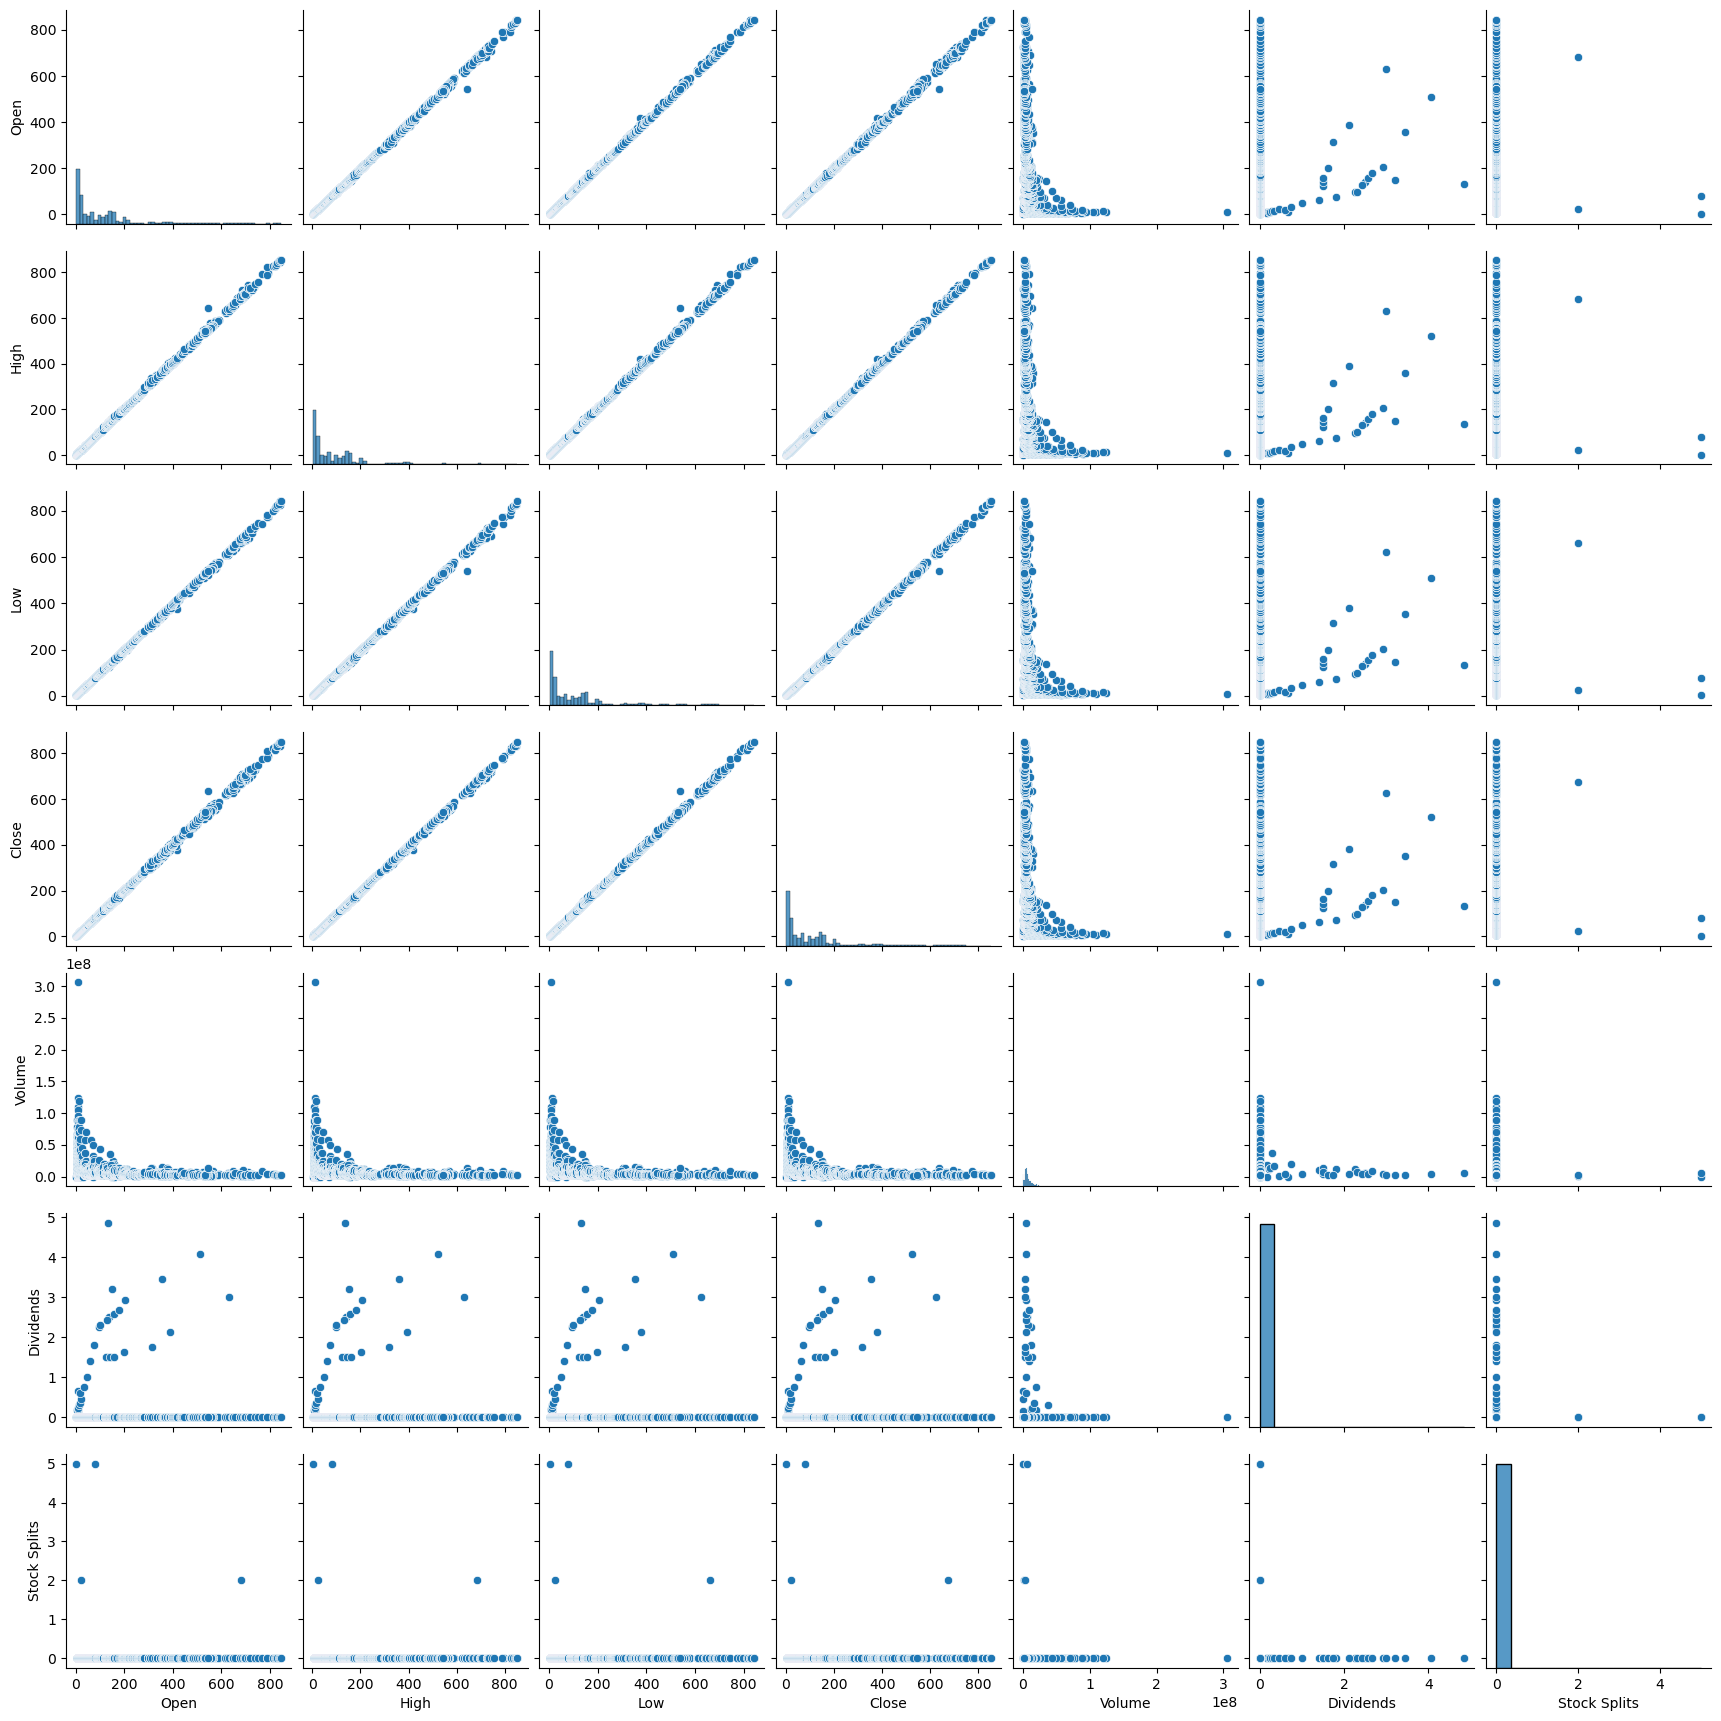

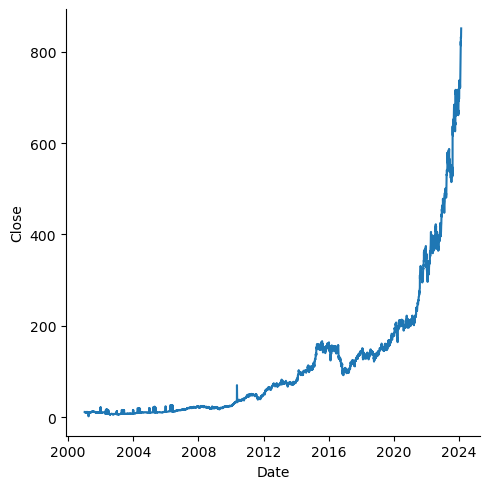

In [42]:
plots(stock)

# Feature selcetion

In [55]:
#del stock['Stock Splits']
#del stock['Dividends']

stock['Tomorrow'] = stock['Close']
stock['Target'] = (stock['Tomorrow'] > stock['Close']).astype(int)
stock

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2001-01-08 00:00:00+01:00,11.932142,12.025120,11.699698,11.715194,7744000,11.715194,0
2001-01-09 00:00:00+01:00,11.715194,11.715194,11.715194,11.715194,0,11.715194,0
2001-01-10 00:00:00+01:00,10.692437,10.692437,10.165563,10.444497,9698000,10.444497,0
2001-01-11 00:00:00+01:00,10.398008,10.475489,10.320526,10.444497,4582000,10.444497,0
2001-01-12 00:00:00+01:00,10.444497,10.444497,10.444497,10.444497,0,10.444497,0
...,...,...,...,...,...,...,...
2024-02-12 00:00:00+01:00,842.200012,845.700012,825.599976,830.599976,2315507,830.599976,0
2024-02-13 00:00:00+01:00,831.099976,841.400024,826.700012,832.299988,2291893,832.299988,0
2024-02-14 00:00:00+01:00,836.000000,848.200012,829.299988,846.900024,2400453,846.900024,0


In [56]:
X = stock.drop(columns='Target')
y = stock['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model selection

In [60]:
rf = RandomForestClassifier()

def train_model(model):
    for model in [model]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        train_acc = round(model.score(X_train, y_train) * 100, 2)
        test_acc = round(accuracy_score(y_test, y_pred)*100, 2)
        print('This is the train accuracy for the model',train_acc)
        print('This is the test accuracy for the model', test_acc)
        return y_pred

In [61]:
train_model(rf)

This is the train accuracy for the model 100.0
This is the test accuracy for the model 100.0


array([0, 0, 0, ..., 0, 0, 0])